# 6. Representing data as tables

In this lecture we demonstrate:
1. how to represent tables using lists;
2. how to represent tables using a more efficient model provided by the _pandas_ library;
3. how to visualize data represented as tables; and
4. how to read tables from local files and remote resources.

## 6.1. Representing tables by lists

The most efficient way to organize large amounts of data is to put them in a table. For example, this table contains some basic facts about a group of students:

| __Name__ | __Sex__ | __Age (yrs)__ | __Weight (kg)__ | __Height (cm)__ |
|---|---|---|---|---|
|     Anne | f | 13 | 46 | 160 |
|      Ben | m | 14 | 52 | 165 |
|    Colin | m | 13 | 47 | 157 |
|    Diana | f | 15 | 54 | 165 |
|    Ethan | m | 15 | 56 | 163 |
|     Fred | m | 13 | 45 | 159 |
|   Gloria | f | 14 | 49 | 161 |
|   Hellen | f | 15 | 52 | 164 |
|      Ian | m | 15 | 57 | 167 |
|     Jane | f | 13 | 45 | 158 |
|     Kate | f | 14 | 51 | 162 |

We shall represent each row in this table as a list, and then put all the these lists into a new list:

In [1]:
students = [["Anne",    "f", 13, 46, 160],
            ["Ben",     "m", 14, 52, 165],
            ["Colin",   "m", 13, 47, 157],
            ["Diana",   "f", 15, 54, 165],
            ["Ethan",   "m", 15, 56, 163],
            ["Fred",    "m", 13, 45, 159],
            ["Gloria",  "f", 14, 49, 161],
            ["Hellen",  "f", 15, 52, 164],
            ["Ian",     "m", 15, 57, 167],
            ["Jane",    "f", 13, 45, 158],
            ["Kate",    "f", 14, 51, 162]]

We can now easily retrieve the information about any student in the group. For example, to see the information about Ethan we simply type `students[4]` (_Important! The first element of the list in indexed by 0, so Ethan's list has index 4_):

In [2]:
students[4]

['Ethan', 'm', 15, 56, 163]

On the other hand, this way of representing tables in inconvenient because it is not easy to work with the columns of the table. For example, if we wanted to compute the average height of the students in the group we would have to write a program:

In [3]:
sum = 0
for s in students:
    sum += s[4]
float(sum) / len(students)

161.9090909090909

This how the code does the job:

* we first initialize the variable `sum` to 0 (eventually it will contain the sum of the heights of the students);
* the code then loops through each student in the group and adds its height to `sum` (the height of a student is the numer at the index 4 of the list);
* finally, we compute the average.

This is not hard but also not very convenient. We need a more flexible data structure.

## 6.2. _pandas_, _DataFrame_ and working with the columns of the table

The _pandas_ library has been developed with efficient manupulation of tables in mind. Let's import the library and give it a nickname:

In [4]:
import pandas as pd

This library provides a powerful data structure called _DataFrame_. Let us start by converting the data on the group of students into a DataFrame:

In [5]:
students_df = pd.DataFrame(students)

This command simply rearranges the data from the list `students` into a DataFrame. Let's see what a DataFrame looks like:

In [6]:
students_df

,0,1,2,3,4
0,Anne,f,13,46,160
1,Ben,m,14,52,165
2,Colin,m,13,47,157
3,Diana,f,15,54,165
4,Ethan,m,15,56,163
5,Fred,m,13,45,159
6,Gloria,f,14,49,161
7,Hellen,f,15,52,164
8,Ian,m,15,57,167
9,Jane,f,13,45,158


All the information is there, arranged in a neat table. To make the table more readable we shall name the columns of the table using the option `columns`:

In [7]:
students_df.columns=["Name", "Sex", "Age", "Weight", "Height"]
students_df

,Name,Sex,Age,Weight,Height
0,Anne,f,13,46,160
1,Ben,m,14,52,165
2,Colin,m,13,47,157
3,Diana,f,15,54,165
4,Ethan,m,15,56,163
5,Fred,m,13,45,159
6,Gloria,f,14,49,161
7,Hellen,f,15,52,164
8,Ian,m,15,57,167
9,Jane,f,13,45,158


Now that each column has its name we can access the individual colums like this:

In [8]:
students_df["Name"]

0       Anne
1        Ben
2      Colin
3      Diana
4      Ethan
5       Fred
6     Gloria
7     Hellen
8        Ian
9       Jane
10      Kate
Name: Name, dtype: object

In [9]:
students_df["Height"]

0     160
1     165
2     157
3     165
4     163
5     159
6     161
7     164
8     167
9     158
10    162
Name: Height, dtype: int64

You can always get the name of all the columns in the table:

In [10]:
students_df.columns

Index(['Name', 'Sex', 'Age', 'Weight', 'Height'], dtype='object')

The following functions make it easy for us to compute the elementary statistics on columns of a DataFrame:
* `sum` -- the sum of the elements in a column;
* `mean` -- the average value (_arithmetic mean_) of the elements in a column;
* `median` -- the median value of the elements in a column;
* `min` -- the minimal value of the elements in a column;
* `max` -- the maximal value of the elements in a column.

For example, the height of the shortest student is:

In [11]:
students_df["Height"].min()

157

The age of the oldest student:

In [12]:
students_df["Age"].max()

15

The average height of students:

In [13]:
students_df["Height"].mean()

161.9090909090909

The medial height:

In [14]:
students_df["Height"].median()

162.0

Can the entire group fit in an elevator which holds at most 600 kg?

In [15]:
if students_df["Weight"].sum() <= 600:
    print("Yes")
else:
    print("No")

Yes


## 6.3. Visualizing data represented by DataFrames

This is easy: just select the columns you would like to visualize. To see a few examples we start by loading our favourite library:

In [16]:
import matplotlib.pyplot as plt

To visualize the height of students in the group we simply plot a bar chart which displays names and heights of students:

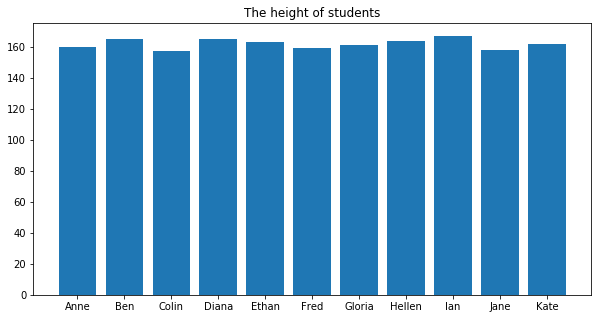

In [17]:
plt.figure(figsize=(10,5))
plt.bar(students_df["Name"], students_df["Height"])
plt.title("The height of students")
plt.show()
plt.close()

We can also visualize the age and weight of the students:

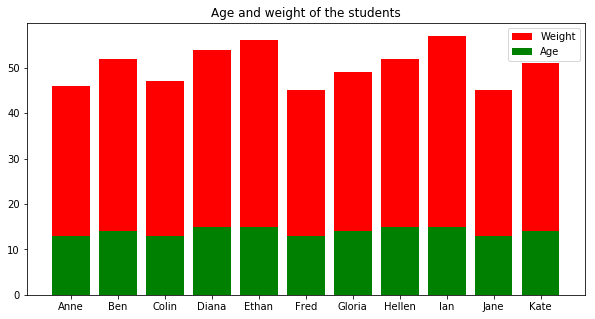

In [18]:
plt.figure(figsize=(10,5))
plt.bar(students_df["Name"], students_df["Weight"], color="r", label="Weight")
plt.bar(students_df["Name"], students_df["Age"], color="g", label="Age")
plt.title("Age and weight of the students")
plt.legend()
plt.show()
plt.close()

## 6.4. Loading tables from local _CSV_ files

The most time-consumig and the least appealing job in data analysis is turning raw data into tables. You may not have noticed that because the tables we have been using for demonstration were small, but in real life situations we usually get _huge_ tables with thousands of rows and columns. (Have you ever heard of a part of data science called _Big Data_?)

Today we use machines to collected data (automatic meteorogical stations, computerized polling stations etc). The machines then package the data they have collected into some very simple format that we can later load and process. _CSV_ stands for "comma separated values" and is one of the simplest (and most popular) formats to represent tables. CSV files are text files whose rows correspond to the rows of the table, and the values within the same row are separated by commas ("comma separated values").

For example, there is a file _Top 25 YouTubers.csv_ in folder _data_ that looks like this:

    RANK,GRADE,NAME,VIDEOS,SUBSCRIBERS,VIEWES
    1,A++,T-Series,13629,105783888,76945588449
    2,A,PewDiePie,3898,97853589,22298927681
    3,A+,5-Minute Crafts,3341,58629572,14860695079
    4,A++,Cocomelon - Nursery Rhymes,441,53163816,33519273951
    ...
    25,A,TheEllenShow,10542,33362512,16519572219

This table contains information about top 25 YouTube channels according to the number of subscribers on July 1st, 2019. The first row of the file is the header row which tells us that the table has six columns (RANK, GRADE, NAME, VIDEOS, SUBSCRIBERS, VIEWES). The row

    4,A++,Cocomelon - Nursery Rhymes,441,53163816,33519273951

means that the 4th most popular YouTube channel (on July 1st, 2019) has YouTube rank A++, its name is "Cocomelon - Nursery Rhymes", has published 441 videos on YouTube, has 53,163,816 subscribers and 33,519,273,951 views.

The function `read_csv` from `pandas` reads a _CSV_ file and turns it into a _DataFrame_. For example:

In [19]:
import pandas as pd
Top25 = pd.read_csv("data/Top 25 YouTubers.csv")

We can peek into the table using the function `head(N)` which displays the first N rows of a table. If we invoke the function without the argument it displays the first five rows:

In [20]:
Top25.head()

,RANK,GRADE,NAME,VIDEOS,SUBSCRIBERS,VIEWES
0,1,A++,T-Series,13629,105783888,76945588449
1,2,A,PewDiePie,3898,97853589,22298927681
2,3,A+,5-Minute Crafts,3341,58629572,14860695079
3,4,A++,Cocomelon - Nursery Rhymes,441,53163816,33519273951
4,5,A++,SET India,31923,51784081,36464793233


In [21]:
Top25.head(10)

,RANK,GRADE,NAME,VIDEOS,SUBSCRIBERS,VIEWES
0,1,A++,T-Series,13629,105783888,76945588449
1,2,A,PewDiePie,3898,97853589,22298927681
2,3,A+,5-Minute Crafts,3341,58629572,14860695079
3,4,A++,Cocomelon - Nursery Rhymes,441,53163816,33519273951
4,5,A++,SET India,31923,51784081,36464793233
5,6,A+,Canal KondZilla,1100,50560964,25446405744
6,7,A+,WWE,42404,46098586,34085586984
7,8,B+,Justin Bieber,134,45873439,625649566
8,9,A,Dude Perfect,209,43796634,8354321862
9,10,A+,Badabun,4406,41131131,13175713909


The function `tail(N)` displays the last N rows of the table (or only 5 if no arguemtn is provided):

In [22]:
Top25.tail()

,RANK,GRADE,NAME,VIDEOS,SUBSCRIBERS,VIEWES
20,21,B-,Katy Perry,97,34416819,361332307
21,22,A,Felipe Neto,1872,33549096,7458531306
22,23,A,JustinBieberVEVO,122,33514535,18873475304
23,24,A,Fernanfloo,534,33378699,7201866552
24,25,A,TheEllenShow,10542,33362512,16519572219


In [23]:
Top25.tail(7)

,RANK,GRADE,NAME,VIDEOS,SUBSCRIBERS,VIEWES
18,19,A-,elrubiusOMG,809,35324033,7772447040
19,20,B,Taylor Swift,166,34920060,255089844
20,21,B-,Katy Perry,97,34416819,361332307
21,22,A,Felipe Neto,1872,33549096,7458531306
22,23,A,JustinBieberVEVO,122,33514535,18873475304
23,24,A,Fernanfloo,534,33378699,7201866552
24,25,A,TheEllenShow,10542,33362512,16519572219


Let us visualize the number of subsrcibers of the top 25 YouTube channels:

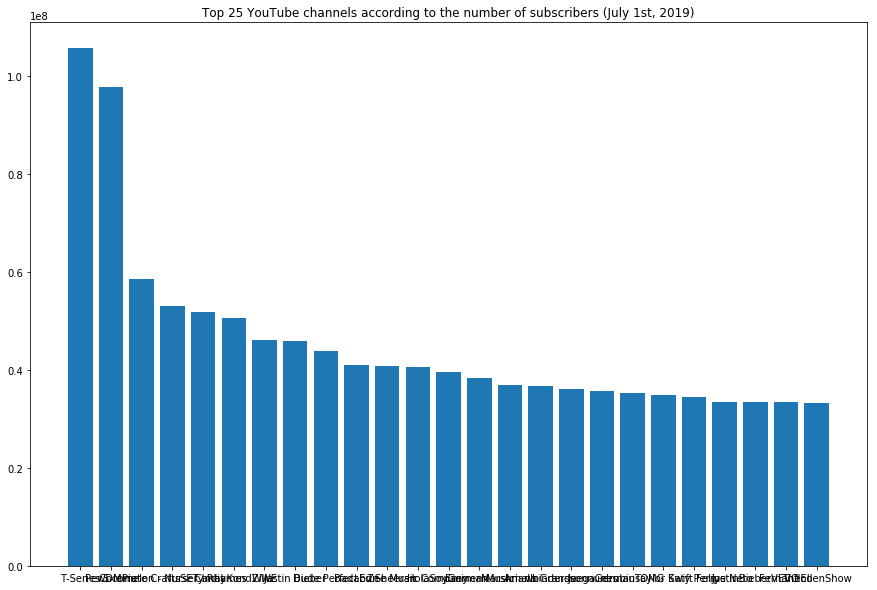

In [24]:
plt.figure(figsize=(15,10))
plt.bar(Top25["NAME"], Top25["SUBSCRIBERS"])
plt.title("Top 25 YouTube channels according to the number of subscribers (July 1st, 2019)")
plt.show()
plt.close()

It's a mess because the names of the channels are too long. In these situations using `barh` instead of `bar` can produce better results:

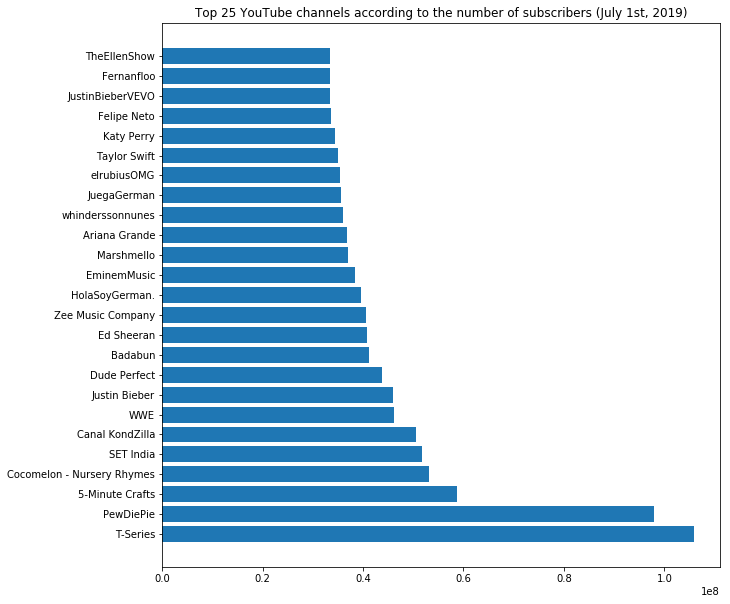

In [25]:
plt.figure(figsize=(10,10))
plt.barh(Top25["NAME"], Top25["SUBSCRIBERS"])
plt.title("Top 25 YouTube channels according to the number of subscribers (July 1st, 2019)")
plt.show()
plt.close()

## 6.5. Loading tables from remote resources

You can also load data from a remote resource directly, without the need to download the the data to your machine. In order to load a table from a remote resource you need an Internet connection (of course!) and you have to know the _exact location_ of the table you want to load. The exact location of anu Internet resouce is provided by its _URL_ (which stands for _Universal Resource Locator_).

The "Internet address"

    https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv
    
contains a publicly available list of all the countries in the world. We can read this table directly using `read_csv`:

In [26]:
countries = pd.read_csv("https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv")
countries.head(10)

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA
5,Burundi,AFRICA
6,Cameroon,AFRICA
7,Cape Verde,AFRICA
8,Central African Republic,AFRICA
9,Chad,AFRICA


The tables available on the Internet are usually not conveniently pre-packaged into a CSV file. They are most often embedded into a web page and surounded by some extra _HTML_ code (_HTML_ stands for "hyper-text markup language" and denotes the language all the web-pages on Earth are coded into).

Fortunately, the function `read_html` can take a web-page and extract a table from it. For example, the following code reads the list of all the US states into a DataFrame directly from a Wikipedia web-page:

In [27]:
US = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states", header=[0,1])[0]

Web pages are complex and can contain several tables. This is why `read_html` returns a list of tables. In this case the table we need is the first in the list, hence the indexing `[0]`. The option `header=[0,1]` means that the first two rows of the table make up the header. Let's peek:

In [28]:
US.head()

,Name &postal abbreviation[1],Cities,Established[upper-alpha 1],Population[upper-alpha 2][3],Total area[4],Land area[4],Water area[4],Numberof Reps.,Unnamed: 8_level_0,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,Unnamed: 12_level_0
,Capital,Largest[5],mi2,km2,mi2,km2,mi2,km2,Unnamed: 8_level_1,Unnamed: 9_level_1,Unnamed: 10_level_1,Unnamed: 11_level_1,Unnamed: 12_level_1
0,Alabama,AL,Montgomery,Birmingham,"Dec 14, 1819",4874747,52420,135767,50645,131171,1775,4597,7.0
1,Alaska,AK,Juneau,Anchorage,"Jan 3, 1959",739795,665384,1723337,570641,1477953,94743,245384,1.0
2,Arizona,AZ,Phoenix,"Feb 14, 1912",7016270,113990,295234,113594,294207,396,1026,9,NaN
3,Arkansas,AR,Little Rock,"Jun 15, 1836",3004279,53179,137732,52035,134771,1143,2961,4,NaN
4,California,CA,Sacramento,Los Angeles,"Sep 9, 1850",39536653,163695,423967,155779,403466,7916,20501,53.0


## 6.6. Exercises

**Exercise 1.** Look at the code and answer the questions below:

157 161.5 161.5


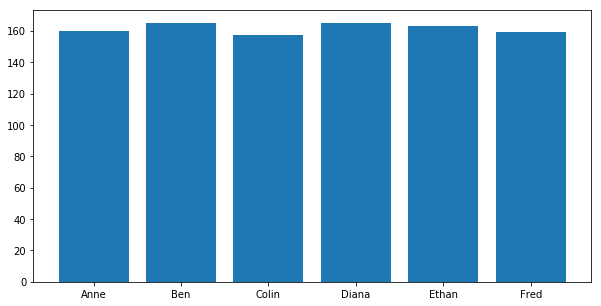

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

students = [["Anne",    "f", 13, 46, 160],
            ["Ben",     "m", 14, 52, 165],
            ["Colin",   "m", 13, 47, 157],
            ["Diana",   "f", 15, 54, 165],
            ["Ethan",   "m", 15, 56, 163],
            ["Fred",    "m", 13, 45, 159]]

table = pd.DataFrame(students)
table.columns=["Name", "Sex", "Age", "Weight", "Height"]

print(table["Height"].min(), table["Height"].mean(), table["Height"].median())

plt.figure(figsize=(10,5))
plt.bar(table["Name"], table["Height"])
plt.show()
plt.close()

temp_anomalies = pd.read_csv("data/TempAnomalies.csv", header=None)
countries = pd.read_csv("https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv")
US = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states", header=[0,1])[0]

1. Why do we have to import two libraries?
2. Why do we represent the tables by DataFrames, and not lists?
3. What are the names of the columns in the DataFrame `table`?
4. What is the difference between `min`, `mean` and `median`?
5. What do you have to change to make the chart depict the weight of students?
6. How would you load the file `TempAnomalies.csv` if it had a header row?
7. Is the DataFrame `countries` created from the information stored locally on your computer?
8. What is the format of the table the DataFrame `US` was created from?
9. What happens if you type `https://simple.wikipedia.org/wiki/List_of_U.S._states` into the browser?

**Exercise 2.** The table below depicts the production of corn a wheat in an agricultural region of Europe (the numbers are in 1000 tons):

| Year | Corn  | Wheat |
|--|--|--|
| 2008 | 6,158 | 2,095 |
| 2009 | 6,396 | 2,067 |
| 2010 | 7,207 | 1,631 |
| 2011 | 6,480 | 2,076 |
| 2012 | 3,532 | 1,911 |

_(a)_ Turn this table into a list and create a _DataFrame_ from the list. Then compute the maximal yield of corn and the minimal yield of wheat.

_(b)_ Visualize the data using a bar chart.

_(c)_ Compute the average yield of corn; then compute the difference between the maximal and the minimal yield of wheat.

**Exercise 3.** This is an overview of spendings of a family over a year (in the local currency):
  
  | Item | Jan | Feb | Mar | Apr | May | Jun | Jul | Aug | Sep | Oct | Nov | Dec |
  |--------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
  | Rent             | 8,251 | 8,436 | 8,524 | 8,388 | 8,241 | 8,196 | 8,004 | 7,996 | 7,991 | 8,015 | 8,353 | 8,456 |
  | Electricity      | 4,321 | 4,530 | 4,115 | 3,990 | 3,985 | 3,726 | 3,351 | 3,289 | 3,295 | 3,485 | 3,826 | 3,834 |
  | Phone (landline) | 1,425 | 1,538 | 1,623 | 1,489 | 1,521 | 1,485 | 1,491 | 1,399 | 1,467 | 1,531 | 1,410 | 1,385 |
  | Phone (cell)     | 2,181 | 2,235 | 2,073 | 1,951 | 1,989 | 1,945 | 3,017 | 2,638 | 2,171 | 1,831 | 1,926 | 1,833 |
  | TV and Internet  | 2,399 | 2,399 | 2,399 | 2,399 | 2,399 | 2,399 | 2,399 | 2,399 | 2,399 | 2,399 | 2,399 | 2,399  |
  | Transport        | 1,830 | 1,830 | 1,830 | 1,830 | 1,950 | 1,950 | 1,450 | 1,450 | 1,950 | 1,950 | 2,050 | 2,050 |
  | Food             | 23,250 | 23,780 | 24,019 | 24,117 | 24,389 | 24,571 | 24,736 | 24,951 | 25,111 | 25,389 | 25,531 | 25,923 |
  | Rest             | 4,500 | 3,700 | 5,100 | 3,500 | 2,750 | 4,250 | 7,320 | 8,250 | 3,270 | 4,290 | 3,200 | 8,390 |

This table represented as a list looks like this:

In [30]:
spendings = [
  ["Rent", 8251, 8436, 8524, 8388, 8241, 8196, 8004, 7996, 7991, 8015, 8353, 8456],
  ["Electricity", 4321, 4530, 4115, 3990, 3985, 3726, 3351, 3289, 3295, 3485, 3826, 3834],
  ["Landline", 1425, 1538, 1623, 1489, 1521, 1485, 1491, 1399, 1467, 1531, 1410, 1385],
  ["Cell", 2181, 2235, 2073, 1951, 1989, 1945, 3017, 2638, 2171, 1831, 1926, 1833],
  ["TV and Internet", 2399, 2399, 2399, 2399, 2399, 2399, 2399, 2399, 2399, 2399, 2399, 2399 ],
  ["Transport", 1830, 1830, 1830, 1830, 1950, 1950, 1450, 1450, 1950, 1950, 2050, 2050],
  ["Food", 23250, 23780, 24019, 24117, 24389, 24571, 24736, 24951, 25111, 25389, 25531, 25923],
  ["Rest", 4500, 3700, 5100, 3500, 2750, 4250, 7320, 8250, 3270, 4290, 3200, 8390]
]

_(a)_ Turn this into a _DataFrame_.

_(b)_ Compute the total spendings per month (how much in January, how much in February, etc).

**Exercise 4.** The file _data/LEB.csv_ contains the overall _Life Expectancy at Birth_ of humans computed in five-year periods.

_(a)_ Load this file into a _DataFrame_.

_(b)_ Visualize the data.

**Exercise 5.** At a PE lecture the students were practising long jumps. Each student had three tries and the data is collected in _LongJump.csv_ available in the folder _data_. The first row of the file is the header.

_(a)_ Load this file into a _DataFrame_.

_(b)_ Visualize the data by a bar chart. (Hint: Be creative.)

**Exercise 6.** At the following URL

    https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv

you can find a publicly available table with the list of countries in the world and some parameters of economic developemnt of the states summarized in five-year intervals. The table has the following columns:

* country
* year
* pop (= population)
* continent
* lifeExp (= life expextancy; how many years, on average, is a citizen of that country expected to live)
* gdpPercap (= GDP per capitem; how much money, on average is US dollars, do citizens of that country earn)

Load this table into a _DataFrame_ and display the first 20 rows, as well as the last 10 rows of the table.

**Exercise 7.** Load the table from the following URL

    https://www.worldometers.info/world-population/population-by-country/

into a DataFrame and display the first few rows of the table.